In [1]:
import os
import dynamics
from packaging import version
import torch
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import glob
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as ptl
from models import HigherOrderModel
import seaborn as sns
#imports all the above packages
#warning comes from the crossvalidation file

## Input the model to load and the lifting function to compare to

In [2]:
trained_model_order = 4
trained_data_order = 2
compared_model_order = 2
initialisation="-pipiuniform"
order = 4
trained_lifting_func = dynamics.KuramotoLiftingFunction(order, trained_model_order)
lifting_func = dynamics.KuramotoLiftingFunction(order, 2)
path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation+'/'+'model_non_linearTrue_'+str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
print(path)
model = HigherOrderModel.load_from_checkpoint(path)

our_results/cross_validation/ERHypergraphXGI/data_500_20_4_linear_kuramoto_4_-pipiuniform/model_non_linearTrue_4_fold2/checkpoints/epoch=99-step=2300.ckpt


## Input the function range (i.e. for Kuramoto function values lie in [-\pi, \pi])

In [3]:
min_value = -0.8
max_value = 0.8

In [4]:
min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)

In [5]:
model.models

ModuleList(
  (0): Sequential(
    (linear_encoding): Linear(in_features=2, out_features=128, bias=True)
    (relu0): ReLU()
    (linear0): Linear(in_features=128, out_features=128, bias=True)
    (relu1): ReLU()
    (linear1): Linear(in_features=128, out_features=128, bias=True)
    (relu_out): ReLU()
    (linear_out): Linear(in_features=128, out_features=1, bias=True)
  )
  (1): Sequential(
    (linear_encoding): Linear(in_features=3, out_features=128, bias=True)
    (relu0): ReLU()
    (linear0): Linear(in_features=128, out_features=128, bias=True)
    (relu1): ReLU()
    (linear1): Linear(in_features=128, out_features=128, bias=True)
    (relu_out): ReLU()
    (linear_out): Linear(in_features=128, out_features=1, bias=True)
  )
  (2): Sequential(
    (linear_encoding): Linear(in_features=4, out_features=128, bias=True)
    (relu0): ReLU()
    (linear0): Linear(in_features=128, out_features=128, bias=True)
    (relu1): ReLU()
    (linear1): Linear(in_features=128, out_features=128, 

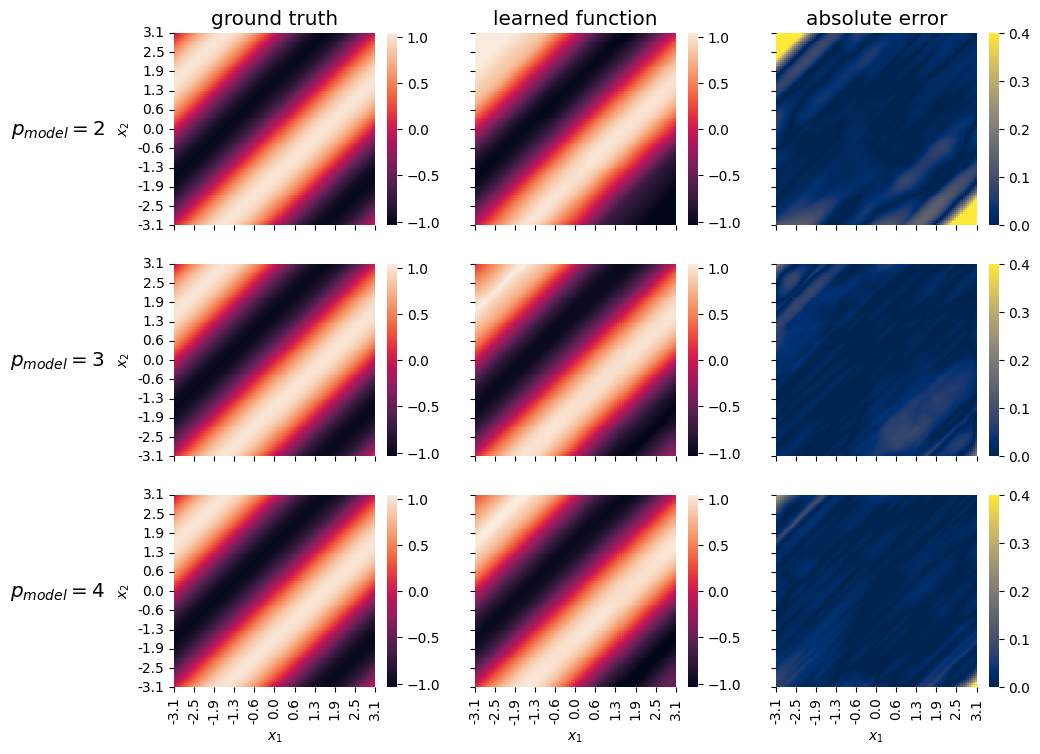

In [6]:
f, axs = plt.subplots(3, 3, figsize=(11, 8.5), sharex=True, sharey=True)
plt.grid(visible=False)

yticklabels = np.round(np.pi*np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]),1)
yticks = np.linspace(0, 100, 11)


for row,trained_model_order in enumerate([2,3,4]):
    trained_lifting_func = dynamics.KuramotoLiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.KuramotoLiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(-np.pi, np.pi, 100)):
        for indx_j, j in enumerate(np.linspace(-np.pi, np.pi, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor([i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value,
                ax=axs[row][0], rasterized=True)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value,
                ax=axs[row][1], rasterized=True)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0, vmax=0.4, 
                ax=axs[row][2], rasterized=True, cmap='cividis')
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()
cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')

for ax, col in zip(axs[2], cols):
    ax.set_xlabel(r'$x_1$')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(r'$x_2$', rotation=90)
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='x-large', ha='right', va='center')
plt.subplots_adjust( wspace=0.2, hspace=0.2)
os.makedirs("./plots/comparison/kuramoto/", exist_ok=True)	
plt.savefig("./plots/comparison/kuramoto/kuramoto_joint.pdf",
            bbox_inches='tight')


## MCMI update function

In [7]:
trained_model_order = 2
trained_data_order = 2
compared_model_order = 2
initialisation="skewed"
order = 4
trained_lifting_func = dynamics.MCMILiftingFunction(order, trained_model_order)
lifting_func = dynamics.MCMILiftingFunction(order, 2)
path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
    '/'+'model_non_linearTrue_' + \
        str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
print(path)
model = HigherOrderModel.load_from_checkpoint(path)

min_value = 0
max_value = 0.06

min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)

our_results/cross_validation/ERHypergraphXGI/data_500_20_4_MCMI_2_skewed/model_non_linearTrue_2_fold2/checkpoints/epoch=99-step=2300.ckpt


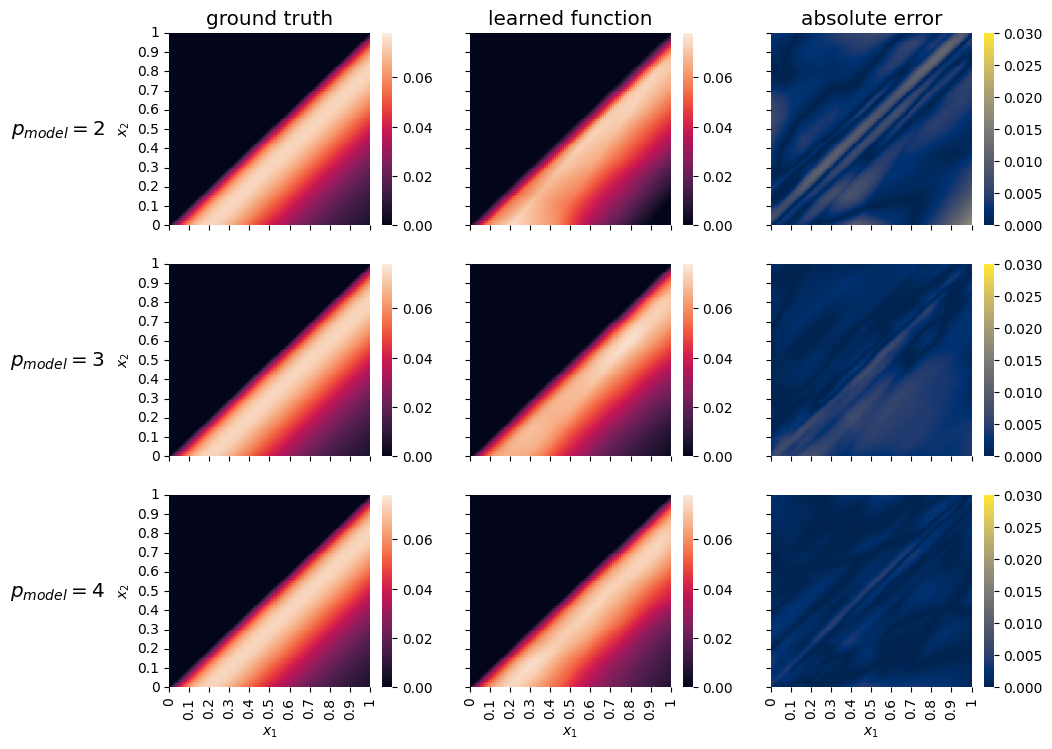

In [8]:
f, axs = plt.subplots(3, 3, figsize=(11, 8.5), sharex=True, sharey=True)
yticklabels = [ 0,0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1]
yticks = np.linspace(0, 100, 11)


for row, trained_model_order in enumerate([2, 3, 4]):
    trained_lifting_func = dynamics.MCMILiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.MCMILiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order) + \
        '_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(0, 1, 100)):
        for indx_j, j in enumerate(np.linspace(0, 1, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor(
                [i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(
                t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value, ax=axs[row][0],rasterized=True)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value, ax=axs[row][1],rasterized=True)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0,vmax=0.03, ax=axs[row][2],rasterized=True, cmap='cividis')
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()
cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')
for ax, col in zip(axs[2], cols):
    ax.set_xlabel(r'$x_1$')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(r'$x_2$', rotation=90)
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='x-large', ha='right', va='center')
    
plt.subplots_adjust(wspace=0.2, hspace=0.2)
os.makedirs("./plots/comparison/MCMI/", exist_ok=True)
plt.savefig("./plots/comparison/MCMI/MCMI_joint.pdf",
            bbox_inches='tight')


## Combined Figure

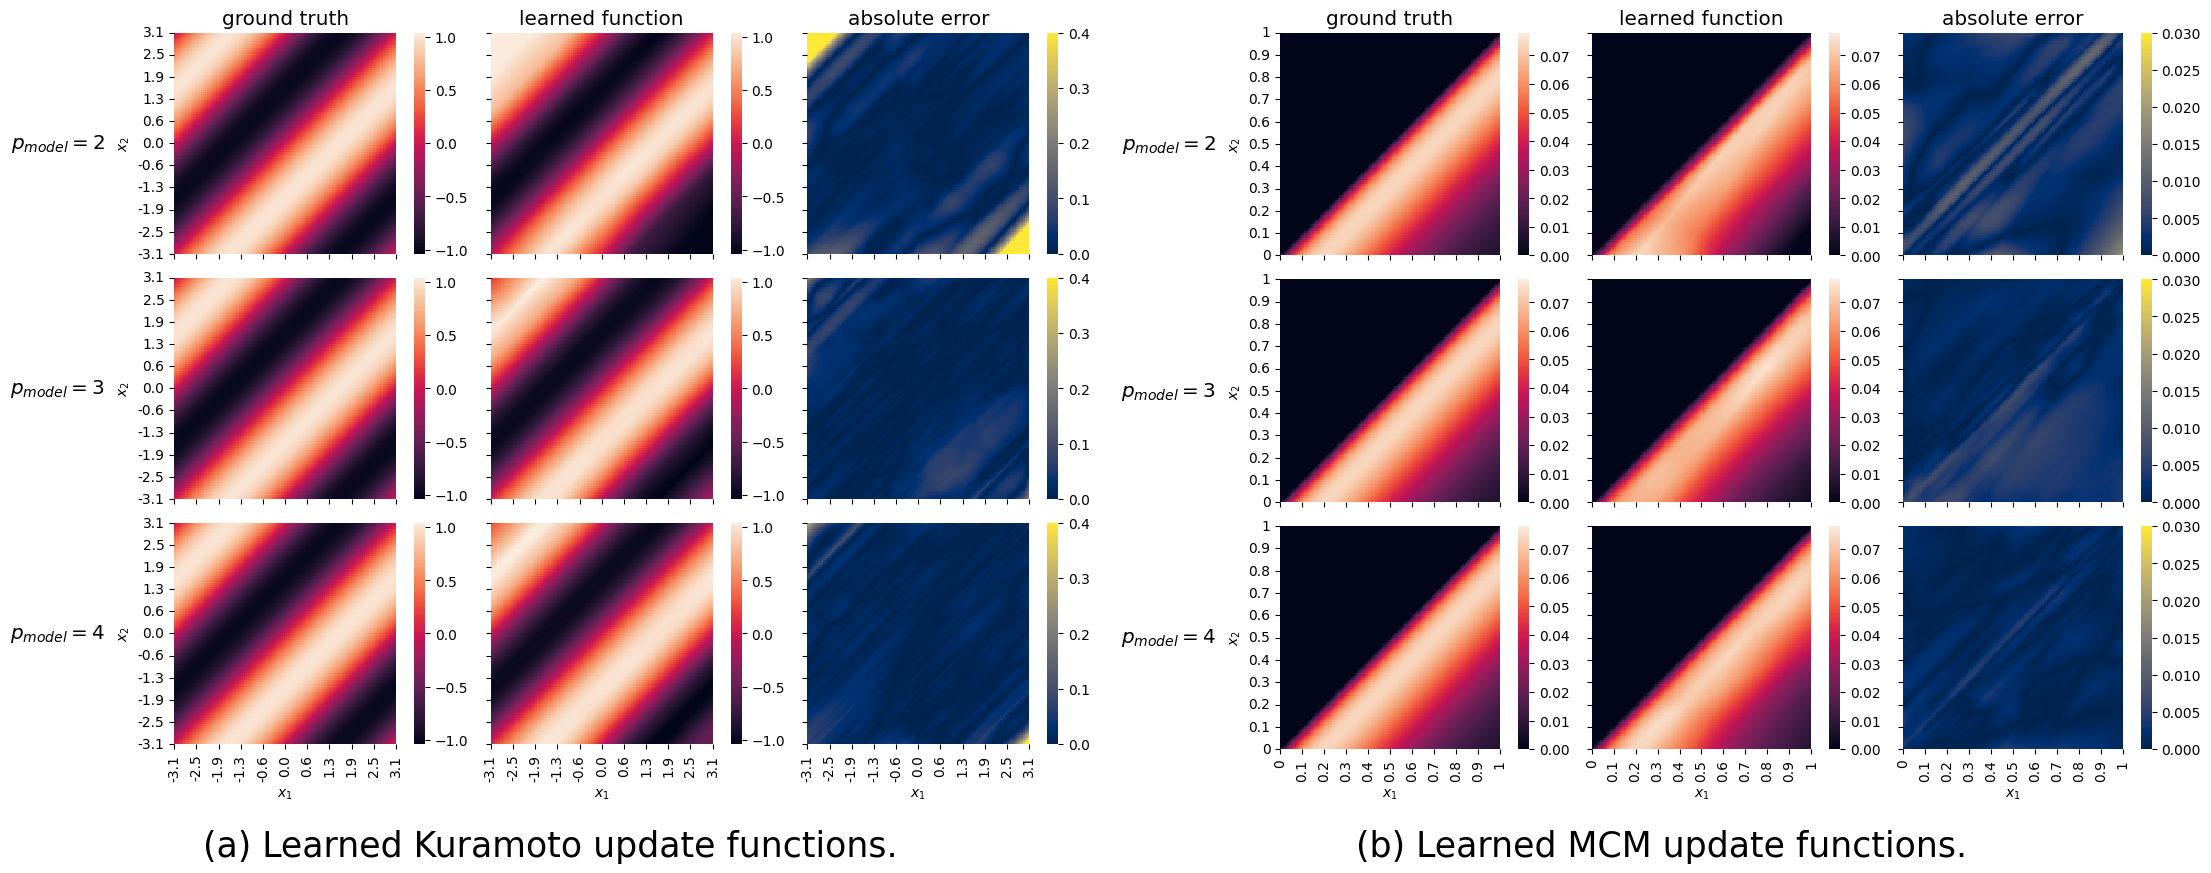

In [9]:
fig = plt.figure(figsize=(22, 8), constrained_layout=True)

subfigs = fig.subfigures(1, 2)
axs = subfigs[0].subplots(3, 3, sharex=True, sharey=True)
plt.grid(visible=False)

yticklabels = np.round(np.pi*np.array([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]),1)
yticks = np.linspace(0, 100, 11)
initialisation="-pipiuniform"
min_value = -0.8
max_value = 0.8
min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)


for row,trained_model_order in enumerate([2,3,4]):
    trained_lifting_func = dynamics.KuramotoLiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.KuramotoLiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(-np.pi, np.pi, 100)):
        for indx_j, j in enumerate(np.linspace(-np.pi, np.pi, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor([i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value,
                ax=axs[row][0], rasterized=True)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels, rotation=0)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels, rotation=90)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value,
                ax=axs[row][1], rasterized=True)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels, rotation=90)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels, rotation=90)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0, vmax=0.4, 
                ax=axs[row][2], rasterized=True, cmap='cividis')
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels, rotation=90)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels, rotation=90)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()
cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')

for ax, col in zip(axs[2], cols):
    ax.set_xlabel(r'$x_1$')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(r'$x_2$', rotation=90)
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='x-large', ha='right', va='center')
#plt.subplots_adjust( wspace=0.2, hspace=0.2)
subfigs[0].suptitle("(a) Learned Kuramoto update functions.", y=-0.03, fontsize=25)



axs = subfigs[1].subplots(3, 3, sharex=True, sharey=True)
plt.grid(visible=False)
yticklabels = [ 0,0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1]
yticks = np.linspace(0, 100, 11)
initialisation="skewed"
min_value = 0
max_value = 0.06
min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)

for row, trained_model_order in enumerate([2, 3, 4]):
    trained_lifting_func = dynamics.MCMILiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.MCMILiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order) + \
        '_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(0, 1, 100)):
        for indx_j, j in enumerate(np.linspace(0, 1, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor(
                [i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(
                t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value,
                ax=axs[row][0], rasterized=True)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels, rotation=0)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels, rotation=90)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value,
                ax=axs[row][1], rasterized=True)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels, rotation=90)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels, rotation=90)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0,vmax=0.03, 
                ax=axs[row][2], rasterized=True, cmap='cividis')
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels, rotation=90)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels, rotation=90)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()
cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')
for ax, col in zip(axs[2], cols):
    ax.set_xlabel(r'$x_1$')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(r'$x_2$', rotation=90)
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='x-large', ha='right', va='center')


subfigs[1].suptitle("(b) Learned MCM update functions.",y=-0.03, fontsize=25)






os.makedirs("./plots/comparison/both/", exist_ok=True)	
plt.savefig("./plots/comparison/both/update_function_both_joint.pdf",
            bbox_inches='tight', dpi=400)


## SI update function

In [10]:
trained_model_order = 4
trained_data_order = 4
compared_model_order = 2
initialisation="01uniform"
order = 4
trained_lifting_func = dynamics.SILiftingFunction(order, trained_model_order)
lifting_func = dynamics.SILiftingFunction(order, 2)
path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation+'/'+'model_non_linearTrue_'+str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
print(path)
model = HigherOrderModel.load_from_checkpoint(path)

our_results/cross_validation/ERHypergraphXGI/data_500_20_4_SI_4_01uniform/model_non_linearTrue_4_fold2/checkpoints/epoch=99-step=2300.ckpt


In [11]:
min_value = 0.2
max_value = 0.8

In [12]:
min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)

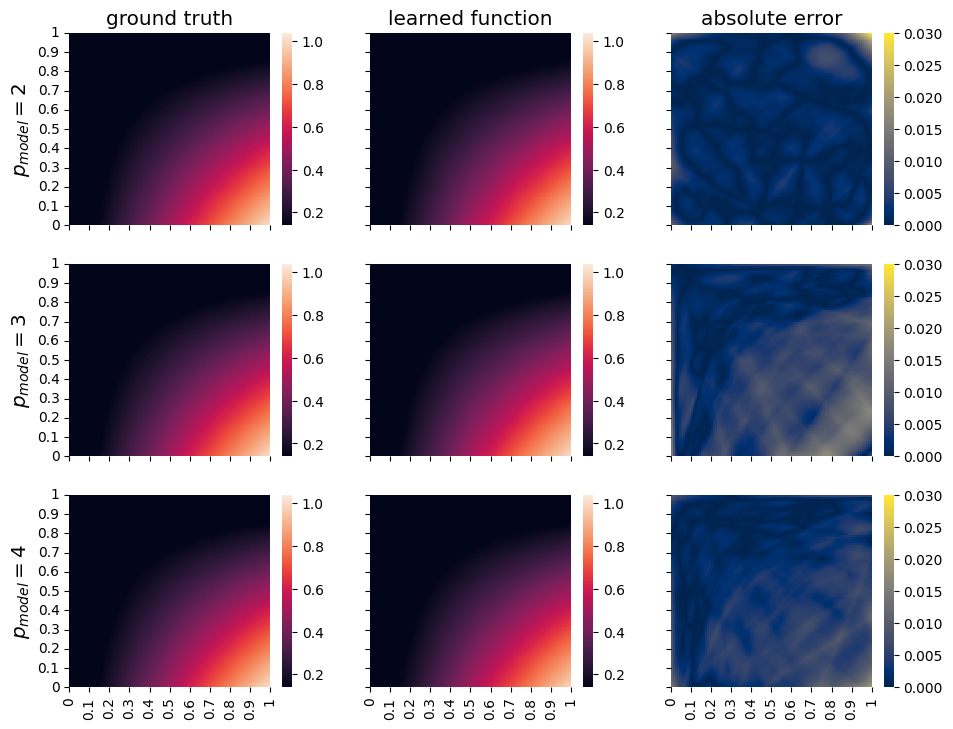

In [14]:
f, axs = plt.subplots(3, 3, figsize=(11, 8.5), sharex=True, sharey=True)
yticklabels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
yticks = np.linspace(0, 100, 11)


for row,trained_model_order in enumerate([2,3,4]):
    trained_lifting_func = dynamics.SILiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.SILiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(0, 1, 100)):
        for indx_j, j in enumerate(np.linspace(0, 1, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor([i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value,
                ax=axs[row][0], rasterized=True)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value,
                ax=axs[row][1], rasterized=True)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0,
                vmax=0.03, ax=axs[row][2], rasterized=True, cmap='cividis')
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()
cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, rotation=90, size='x-large')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
os.makedirs("./plots/comparison/SI/", exist_ok=True)	
plt.savefig("./plots/comparison/SI/SI_joint.pdf",
            bbox_inches='tight')

## Diffusion update function

In [15]:
trained_model_order = 2
trained_data_order = 2
compared_model_order = 2
initialisation="-11uniform"
order = 4
trained_lifting_func = dynamics.DiffusionLiftingFunction(order, trained_model_order)
lifting_func = dynamics.DiffusionLiftingFunction(order, 2)
path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation+'/'+'model_non_linearTrue_'+str(trained_model_order)+'_fold2/checkpoints/epoch=99-step=2300.ckpt'
print(path)
model = HigherOrderModel.load_from_checkpoint(path)

our_results/cross_validation/ERHypergraphXGI/data_500_20_4_diffusion_2_-11uniform/model_non_linearTrue_2_fold2/checkpoints/epoch=99-step=2300.ckpt


In [16]:
min_value = -0.8
max_value = 0.8

In [17]:
min_value = min_value - np.abs(min_value * 0.3) # set margin for error of the model
max_value = max_value + np.abs(max_value * 0.3)

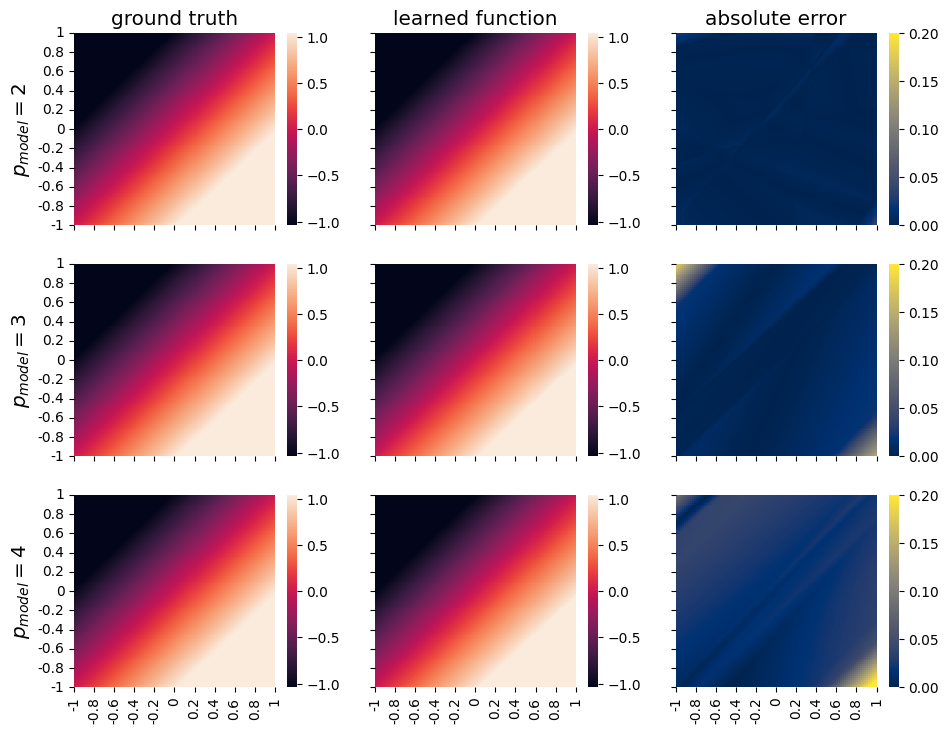

In [18]:
f, axs = plt.subplots(3, 3, figsize=(11, 8.5), sharex=True, sharey=True)

yticklabels = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
yticks = np.linspace(0, 100, 11)



for row, trained_model_order in enumerate([2, 3, 4]):
    trained_lifting_func = dynamics.DiffusionLiftingFunction(
        order, trained_model_order)
    lifting_func = dynamics.DiffusionLiftingFunction(order, 2)
    path = 'our_results/cross_validation/ERHypergraphXGI/data_500_20_4_'+trained_lifting_func.name()+'_'+initialisation + \
        '/'+'model_non_linearTrue_' + \
            str(trained_model_order) + \
        '_fold2/checkpoints/epoch=99-step=2300.ckpt'
    model = HigherOrderModel.load_from_checkpoint(path)

    arr_model = np.zeros((100, 100))
    arr_gt = np.zeros((100, 100))
    for indx_i, i in enumerate(np.linspace(-1, 1, 100)):
        for indx_j, j in enumerate(np.linspace(-1, 1, 100)):
            arr_model[indx_i, indx_j] = model.models[0](torch.tensor(
                [i, j], dtype=torch.float32))  # only look at pairwise function output
            t = torch.tensor([i, j], dtype=torch.float32).reshape((1, 2))
            arr_gt[indx_i, indx_j] = lifting_func.apply(
                t, 2)  # only pairwise lifting function
    sns.heatmap(arr_gt, vmin=min_value, vmax=max_value,
                ax=axs[row][0], rasterized=True, xticklabels=yticklabels, yticklabels=yticklabels)
    axs[row][0].set_yticks(yticks)
    axs[row][0].set_yticklabels(yticklabels)
    axs[row][0].set_xticks(yticks)
    axs[row][0].set_xticklabels(yticklabels)
    sns.heatmap(arr_model, vmin=min_value, vmax=max_value,
                ax=axs[row][1], rasterized=True, xticklabels=yticklabels, yticklabels=yticklabels)
    axs[row][1].set_yticks(yticks)
    axs[row][1].set_yticklabels(yticklabels)
    axs[row][1].set_xticks(yticks)
    axs[row][1].set_xticklabels(yticklabels)
    sns.heatmap(np.abs(arr_model - arr_gt), vmin=0, vmax=0.2, cmap='cividis',
                ax=axs[row][2], rasterized=True, xticklabels = yticklabels, yticklabels=yticklabels)
    axs[row][2].set_yticks(yticks)
    axs[row][2].set_yticklabels(yticklabels)
    axs[row][2].set_xticks(yticks)
    axs[row][2].set_xticklabels(yticklabels)
    axs[row][0].invert_yaxis()
    axs[row][1].invert_yaxis()
    axs[row][2].invert_yaxis()

cols = ["ground truth", "learned function", "absolute error"]
rows = [r'$p_{model}=$'+str(row) for row in [2, 3, 4]]
for ax, col in zip(axs[0], cols):
    ax.set_title(col,fontsize='x-large')

for ax, row in zip(axs[:, 0], rows):
    ax.set_ylabel(row, rotation=90, size='x-large')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
os.makedirs("./plots/comparison/diffusion/", exist_ok=True)	
plt.savefig("./plots/comparison/diffusion/diffusion_joint.pdf",
            bbox_inches='tight')